In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
from math import log, lgamma, exp
from scipy.stats import nbinom

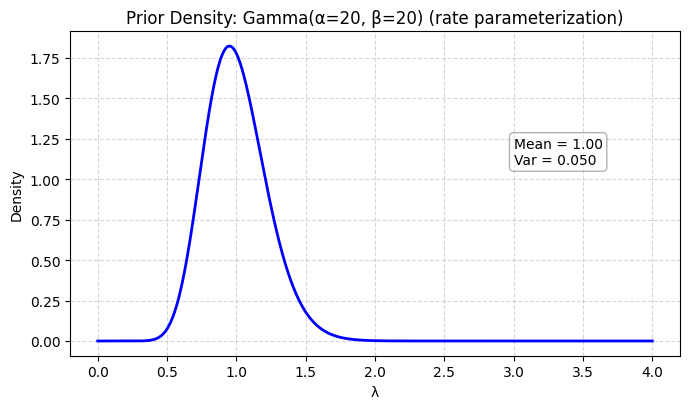

In [ ]:
# 1a

alpha = 20.0  # shape parameter
beta = 20.0   # rate parameter

lam = np.linspace(1e-6, 4.0, 1200)  

# Compute Gamma PDF 
log_pdf = alpha * math.log(beta) - math.lgamma(alpha) + (alpha - 1) * np.log(lam) - beta * lam
pdf = np.exp(log_pdf)

# Compute summary statistics
mean = alpha / beta
var = alpha / (beta ** 2)

plt.figure(figsize=(7, 4.2))
plt.plot(lam, pdf, linewidth=2, color="blue")
plt.title("Prior Density: Gamma(α=20, β=20) (rate parameterization)")
plt.xlabel("λ")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.5)

plt.annotate(f"Mean = {mean:.2f}\nVar = {var:.3f}",
             xy=(3.0, max(pdf)*0.6), fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.6))

plt.tight_layout()
plt.savefig("prior_gamma_20_20.png", dpi=200)
plt.show()


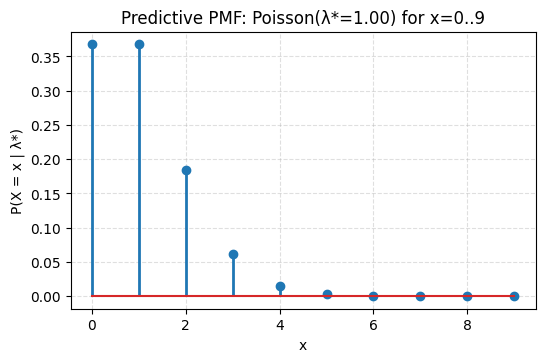

In [ ]:
# 1b.i

lambda_star = alpha / beta  # = 1.0

x = np.arange(0, 10)
pmf = poisson.pmf(x, mu=lambda_star)

plt.figure(figsize=(6, 3.6))
markerline, stemlines, baseline = plt.stem(x, pmf)
plt.setp(markerline, markersize=6)
plt.setp(stemlines, linewidth=2)

plt.title(f"Predictive PMF: Poisson(λ*={lambda_star:.2f}) for x=0..9")
plt.xlabel("x")
plt.ylabel("P(X = x | λ*)")
plt.grid(alpha=0.4, linestyle="--")
plt.show()


In [ ]:
# 1b.ii

alpha, beta = 20.0, 20.0
lambda_star = alpha / beta            
x = np.arange(0, 10)                 
pmf = poisson.pmf(x, mu=lambda_star)   

E_num = np.sum(x * pmf) / np.sum(pmf) 
print(f"[1b(ii)] Numerical E[X] over 0..9 = {E_num:.6f}")

E_analytical = lambda_star
print(f"[1b(ii)] Analytical E[X] = {E_analytical:.6f}")

print("Close or not ", np.isclose(E_num, E_analytical, atol=1e-3))


[1b(ii)] Numerical E[X] over 0..9 = 0.999999
[1b(ii)] Analytical E[X] = 1.000000
Close or not  True


In [ ]:
# 1c

lambda_star = 1.0
data = np.array([3, 4, 1], dtype=float)

logL = np.sum(data * log(lambda_star) - lambda_star - [lgamma(x + 1) for x in data])
L = exp(logL)

print(f"[1c] log-likelihood at λ*={lambda_star:.2f}: {logL:.6f}")
print(f"[1c] likelihood L = {L:.6e}")


[1c] log-likelihood at λ*=1.00: -7.969813
[1c] likelihood L = 3.457435e-04


In [ ]:
# 1d

# First-day data
data = np.array([3, 4, 1], dtype=float)

lambda_mle = float(np.mean(data))
print(f"[1d] MLE(lambda) = sample mean = {lambda_mle:.6f}")

def loglik(lam, x):
    return np.sum(x * log(lam) - lam - np.array([lgamma(xi+1) for xi in x]))

lam_grid = np.linspace(0.01, 10, 5000)  
ll_vals = np.array([loglik(lam, data) for lam in lam_grid])
lam_grid_mle = lam_grid[np.argmax(ll_vals)]
print(f"[1d] Grid-argmax check ≈ {lam_grid_mle:.6f}")


[1d] MLE(lambda) = sample mean = 2.666667
[1d] Grid-argmax check ≈ 2.665873


[1e] Posterior: Gamma(alpha'=28, beta'=23)
[1e] Posterior mean E[λ|D] = 1.217391


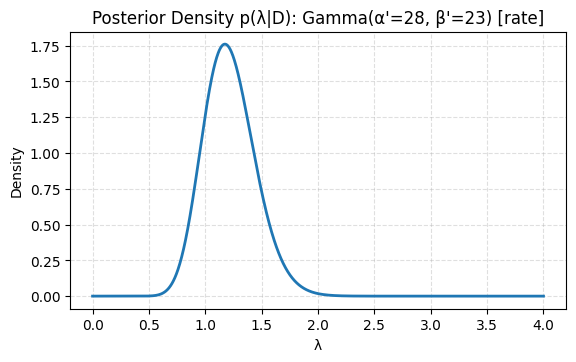

In [11]:
# 1e

alpha0, beta0 = 20.0, 20.0    
data = np.array([3, 4, 1], dtype=float)

alpha_post = alpha0 + data.sum()  
beta_post  = beta0 + len(data)     

print(f"[1e] Posterior: Gamma(alpha'={alpha_post:.0f}, beta'={beta_post:.0f})")
print(f"[1e] Posterior mean E[λ|D] = {alpha_post/beta_post:.6f}")

def gamma_pdf_rate(lam, a, b):
    lam = np.asarray(lam, dtype=float)
    logpdf = a*log(b) - lgamma(a) + (a-1)*np.log(lam) - b*lam
    return np.exp(logpdf)

lam_grid = np.linspace(1e-6, 4.0, 1200)
post_pdf = gamma_pdf_rate(lam_grid, alpha_post, beta_post)

plt.figure(figsize=(6.4, 3.6))
plt.plot(lam_grid, post_pdf, linewidth=2)
plt.title(f"Posterior Density p(λ|D): Gamma(α'={int(alpha_post)}, β'={int(beta_post)}) [rate]")
plt.xlabel("λ")
plt.ylabel("Density")
plt.grid(alpha=0.4, linestyle="--")
plt.show()


In [12]:
# 1f
alpha_post, beta_post = 28.0, 23.0  

if alpha_post <= 1:
    lambda_map = 0.0  
else:
    lambda_map = (alpha_post - 1.0) / beta_post

print(f"[1f] MAP(lambda) = ({alpha_post:.0f}-1)/{beta_post:.0f} = {lambda_map:.6f}")


[1f] MAP(lambda) = (28-1)/23 = 1.173913


[1g] Posterior predictive NB parameters:
     n (α′) = 28.0
     p = β′/(β′+1) = 0.958333


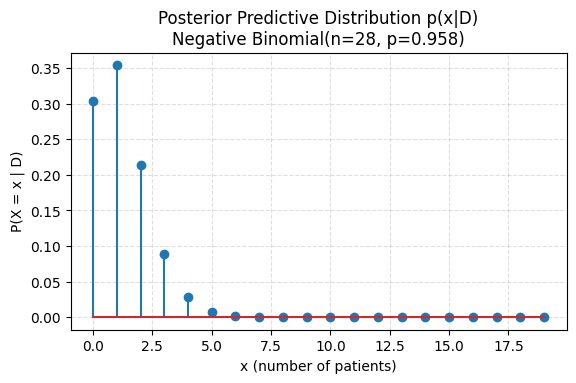

In [15]:
# 1g
alpha_post, beta_post = 28.0, 23.0

n = alpha_post
p = beta_post / (beta_post + 1.0)  

print(f"[1g] Posterior predictive NB parameters:")
print(f"     n (α′) = {n}")
print(f"     p = β′/(β′+1) = {p:.6f}")

x = np.arange(0, 20)  

pmf = nbinom.pmf(x, n, p)  

plt.figure(figsize=(6.4,3.6))
plt.stem(x, pmf)
plt.title(f"Posterior Predictive Distribution p(x|D)\nNegative Binomial(n={n:.0f}, p={p:.3f})")
plt.xlabel("x (number of patients)")
plt.ylabel("P(X = x | D)")
plt.grid(alpha=0.4, linestyle="--")
plt.show()
